In [2]:
import pandas as pd

In [58]:
df = pd.read_csv('기획재정부_OECD_GDP대비 보유세 비중_20211231.csv',  encoding='cp949')

In [7]:
df.head(3)

,국가,단위,1965,1966,1967,1968,1969,1970,1971,1972,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Australia,Percentage,2.4,2.3,2.5,2.5,2.4,2.3,2.2,2.3,...,2.3,2.6,2.8,3.0,3.0,2.9,2.7,2.7,2.9,NaN
1,Austria,Percentage,1.3,1.3,1.4,1.3,1.4,1.3,1.2,1.1,...,0.6,0.7,0.6,0.6,0.5,0.5,0.5,0.5,0.6,0.6
2,Belgium,Percentage,1.2,1.2,1.1,1.3,1.2,5.0,1.3,1.3,...,3.3,3.5,3.5,3.5,3.5,3.5,3.4,3.4,3.4,3.6


- [기획재정부_OECD_ GDP대비 보유세 비중](https://www.data.go.kr/data/15121010/fileData.do) 을 공공데이터 포털에서 다운로드
- [2.2 판다스 치트시트를 활용한 기초 익히기]() 강좌를 통해 사용 방법을 익혀봄

In [11]:
df[df['국가'] == 'Korea']

,국가,단위,1965,1966,1967,1968,1969,1970,1971,1972,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
20,Korea,Percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.1,...,2.5,2.4,2.6,2.9,2.9,3.0,3.1,3.1,3.9,4.5


In [13]:
df['국가'].unique

<bound method Series.unique of 0                                             Australia
1                                               Austria
2                                               Belgium
3                                                Canada
4                                                 Chile
5                                              Colombia
6                                            Costa Rica
7                                        Czech Republic
8                                               Denmark
9                                               Estonia
10                                              Finland
11                                               France
12                                              Germany
13                                               Greece
14                                              Hungary
15                                              Iceland
16                                              Ireland
17               

In [14]:
df_ko = df[df['국가'] == 'Korea']

In [24]:
df_ko.columns

Index(['국가', '단위', '1965', '1966', '1967', '1968', '1969', '1970', '1971',
       '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [59]:
df_ko.pivot

<bound method DataFrame.pivot of        국가          단위 1965  1966  1967  1968  1969  1970  1971  1972  ...  \
20  Korea  Percentage  NaN   NaN   NaN   NaN   NaN   NaN   NaN   1.1  ...   

    2012  2013  2014  2015  2016  2017  2018  2019  2020  2021  
20   2.5   2.4   2.6   2.9   2.9   3.0   3.1   3.1   3.9   4.5  

[1 rows x 59 columns]>

<Axes: >

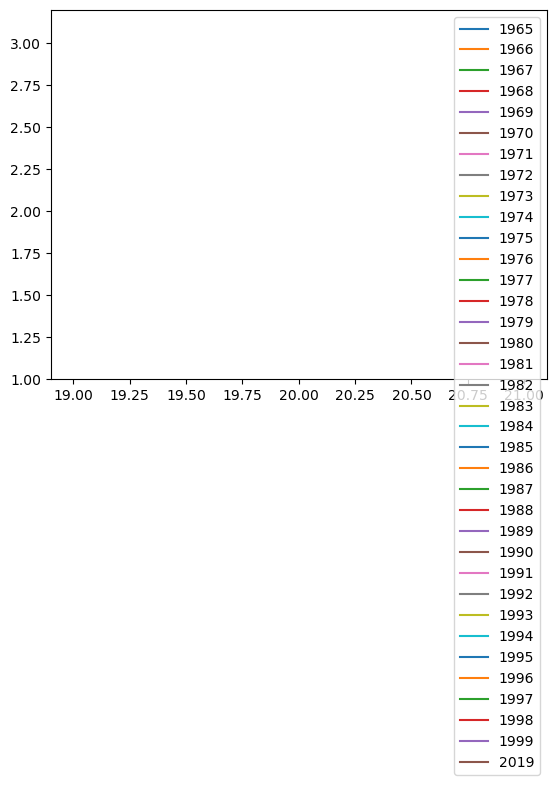

In [29]:
# 연도별 값을 추출
df_year = df_ko.filter(like='19')

# 그래프 그리기
df_year.plot()

In [30]:
df_year

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2019
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.1,1.3,1.3,...,2.3,2.3,2.6,2.7,2.6,2.5,2.4,2.1,2.6,3.1


In [42]:
# NaN 값이 있는 컬럼 제외
df_dropna = df_ko.dropna(axis=1)
df_dropna

,국가,단위,1972,1973,1974,1975,1976,1977,1978,1979,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
20,Korea,Percentage,1.1,1.3,1.3,1.4,1.4,1.3,1.3,1.3,...,2.5,2.4,2.6,2.9,2.9,3.0,3.1,3.1,3.9,4.5


In [43]:
df_year = df_dropna.drop(['국가', '단위'], axis=1)
df_year

,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
20,1.1,1.3,1.3,1.4,1.4,1.3,1.3,1.3,1.4,1.4,...,2.5,2.4,2.6,2.9,2.9,3.0,3.1,3.1,3.9,4.5


<Axes: >

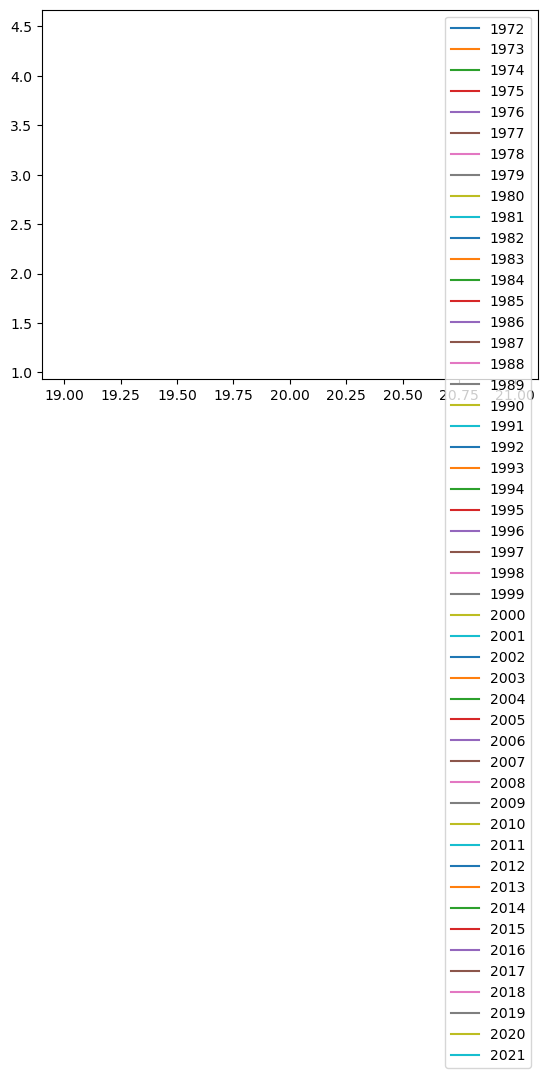

In [52]:
df_year.plot()
# 차트 이상하게 나옴 ㅋㅋ

### pandas 차트 함수에 대하여 검색 - 가이드를 살펴봄 어려움 T T
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

<Axes: title={'center': 'GDP대비 보유세 비중'}>

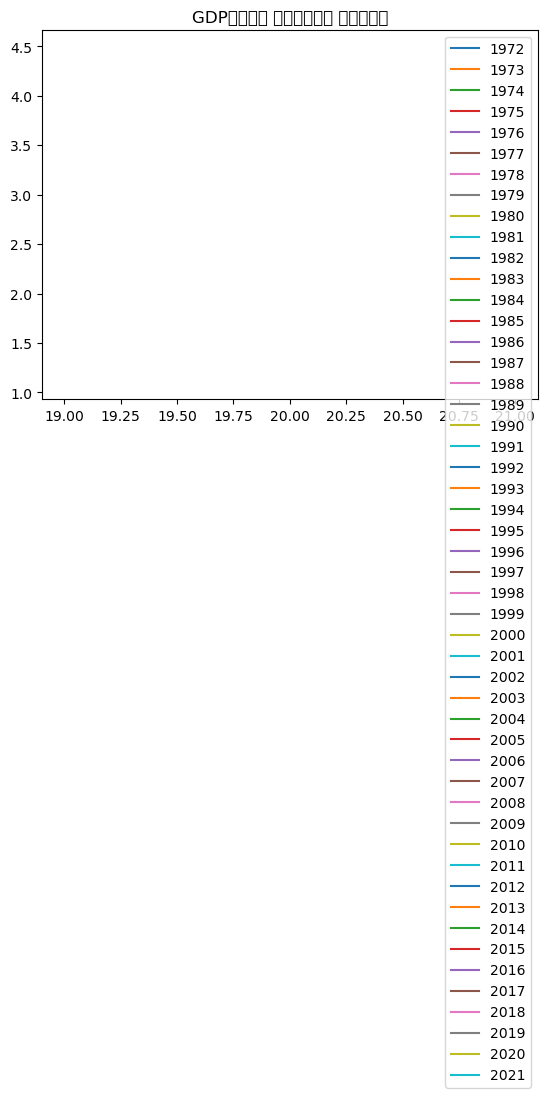

In [62]:
df_year.plot(title="GDP대비 보유세 비중")
# 타이틀 한글이 이상함 T T

# 일단은 불러오기 까지 성공함에 만족
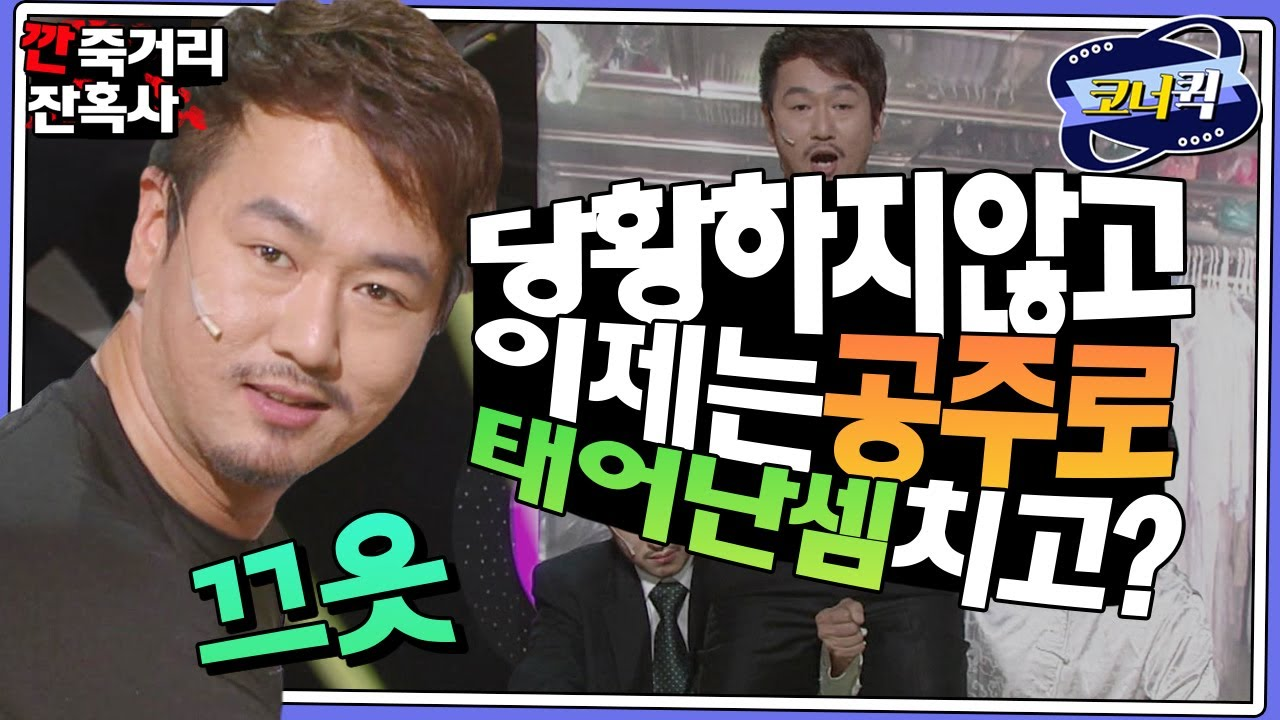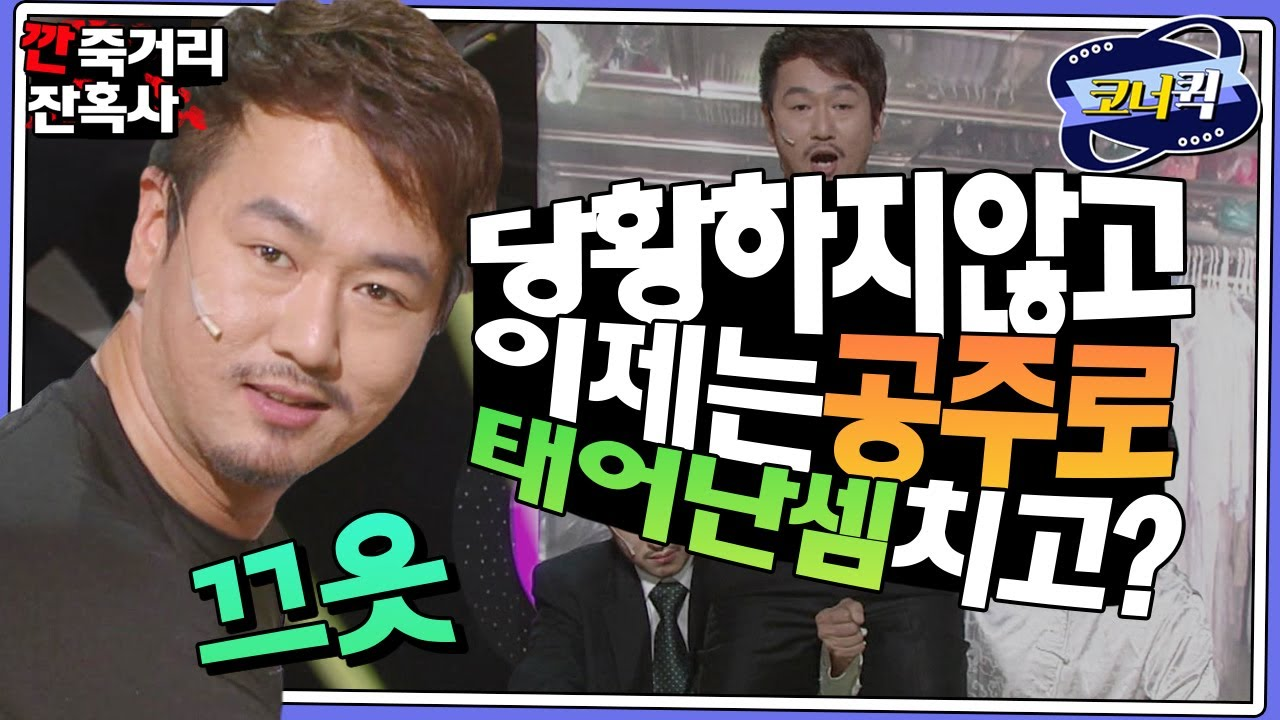